**Pavan Pyla**
 # Fraud Provider Detection In Health Care using several Classification Tecniques

## Importing the Data Imbalance Learning Tolls

In [323]:
!pip install imbalanced-learn

In [324]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

### Reading the data into Data Frame

In [325]:
Train=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")

In [326]:
Train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [327]:
Train_Beneficiarydata

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,1,2,2,2,2,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,1,2,2,2,2,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,2,1,1,1,2,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,1,1,2,2,2,2,2,1,2,2,2,0,0,2650,10


In [328]:
Train_Inpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,2859,1068.0,2009-10-02,812,2851,2762,53550,V0254,V1005,5173,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,79902,1068.0,2009-11-06,228,42823,4148,4019,3970,4241,V1042,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,78605,1068.0,2009-11-22,302,4280,3963,5859,4019,40390,4111,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,7802,1068.0,2009-12-18,309,7802,5859,496,2809,V1254,42822,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
Train_Outpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### OutPatient ,Inpatient and Beneficiary

In [330]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [331]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,on="BeneID")

## Data Preprocessing

In [332]:
Train_Allpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaN,NaN,NaN,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,79380,NaN,NaN,NaN,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE158968,CLM36721,2009-02-02,2009-02-07,PRV56335,8000,PHY346834,PHY376714,NaN,4552,99592,29411,486,V1006,2720,53021,56400,6826,NaN,4311.0,NaN,NaN,NaN,NaN,NaN,1068.0,78909,2009-02-02,2009-02-07,329,1936-02-01,NaN,2,1,0,42,200,12,12,1,2,2,2,2,1,2,2,2,2,2,9500,1568,0,0
558207,BENE158970,CLM44251,2009-03-26,2009-03-31,PRV52019,7000,PHY337065,NaN,NaN,25080,5856,53081,30390,V5867,49120,40493,58381,78701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,78701,2009-03-26,2009-03-31,637,1940-09-01,NaN,2,1,Y,7,0,12,12,2,1,1,1,1,2,1,1,1,2,1,7000,1068,1290,740
558208,BENE159064,CLM72015,2009-10-14,2009-10-23,PRV52135,22000,PHY315112,NaN,NaN,V5789,V1254,5990,4019,4258,5720,57142,2839,V1588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,V5789,2009-10-14,2009-10-23,945,1939-08-01,NaN,1,1,0,10,50,12,12,1,2,2,2,2,2,1,2,2,2,2,22000,1068,0,0
558209,BENE159103,CLM58155,2009-07-02,2009-07-04,PRV53923,4000,PHY420889,PHY428043,NaN,4580,3310,5853,4019,5070,V1271,33182,2720,27651,NaN,8945.0,NaN,NaN,NaN,NaN,NaN,1068.0,4589,2009-07-02,2009-07-04,246,1948-11-01,NaN,1,1,0,23,620,12,12,1,1,1,2,2,1,2,1,1,2,2,4000,1068,0,0


In [333]:
df=pd.merge(Train_Allpatientdata,Train,on='Provider')

In [334]:
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaN,NaN,NaN,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE57978,CLM37910,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,5859,412,99591,V1259,42731,40290,V4501,NaN,8856.0,2724.0,NaN,NaN,NaN,NaN,1068.0,42821,2009-02-11,2009-02-16,309,1942-04-01,2009-06-01,2,2,0,19,350,12,12,2,1,1,2,1,2,1,1,2,1,2,2200,2136,30,100,No
558207,BENE80245,CLM79653,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,25000,25060,71590,27651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29040,2009-12-15,2009-12-18,885,1943-05-01,NaN,1,1,Y,5,200,12,12,1,2,2,2,2,2,1,2,2,2,2,4000,1068,0,0,No
558208,BENE85177,CLM77745,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,4240,4168,27800,71481,2762,42832,V462,V1582,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,78605,2009-11-29,2009-12-07,198,1937-04-01,NaN,1,1,0,14,680,12,12,2,1,2,2,2,2,2,1,2,2,2,8000,1068,0,0,No
558209,BENE105577,CLM53155,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,5715,3051,29590,29410,V4579,E8490,5990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,27651,2009-05-28,2009-05-31,645,1927-11-01,NaN,2,1,0,3,60,12,0,1,1,2,2,2,2,1,1,2,2,2,5000,1068,0,0,No


In [335]:
df=df.drop(['BeneID','ClaimID'],axis=1)

In [336]:
df

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,56409,NaN,NaN,NaN,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,Yes
1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,71947,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,5859,412,99591,V1259,42731,40290,V4501,NaN,8856.0,2724.0,NaN,NaN,NaN,NaN,1068.0,42821,2009-02-11,2009-02-16,309,1942-04-01,2009-06-01,2,2,0,19,350,12,12,2,1,1,2,1,2,1,1,2,1,2,2200,2136,30,100,No
558207,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,25000,25060,71590,27651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29040,2009-12-15,2009-12-18,885,1943-05-01,NaN,1,1,Y,5,200,12,12,1,2,2,2,2,2,1,2,2,2,2,4000,1068,0,0,No
558208,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,4240,4168,27800,71481,2762,42832,V462,V1582,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,78605,2009-11-29,2009-12-07,198,1937-04-01,NaN,1,1,0,14,680,12,12,2,1,2,2,2,2,2,1,2,2,2,8000,1068,0,0,No
558209,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,5715,3051,29590,29410,V4579,E8490,5990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,27651,2009-05-28,2009-05-31,645,1927-11-01,NaN,2,1,0,3,60,12,0,1,1,2,2,2,2,1,1,2,2,2,5000,1068,0,0,No


In [337]:
df.isna().sum()  

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10                553201
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                 558202
ClmProcedureCode_6                 558211
DeductibleAmtPaid                 

In [338]:
df=df.drop(['ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7',
                'ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10',
                'ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4',
                'ClmProcedureCode_5','ClmProcedureCode_6',],axis=1)

In [339]:
df

,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,0.0,56409,NaN,NaN,NaN,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,Yes
1,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
2,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,0.0,71947,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
3,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
4,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,0.0,NaN,NaN,NaN,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,2009-02-11,2009-02-16,PRV53511,0,PHY378514,PHY426843,NaN,40491,41401,1068.0,42821,2009-02-11,2009-02-16,309,1942-04-01,2009-06-01,2,2,0,19,350,12,12,2,1,1,2,1,2,1,1,2,1,2,2200,2136,30,100,No
558207,2009-12-15,2009-12-18,PRV51711,4000,PHY345109,NaN,NaN,2948,3129,1068.0,29040,2009-12-15,2009-12-18,885,1943-05-01,NaN,1,1,Y,5,200,12,12,1,2,2,2,2,2,1,2,2,2,2,4000,1068,0,0,No
558208,2009-11-29,2009-12-07,PRV54503,8000,PHY418343,NaN,NaN,515,5119,1068.0,78605,2009-11-29,2009-12-07,198,1937-04-01,NaN,1,1,0,14,680,12,12,2,1,2,2,2,2,2,1,2,2,2,8000,1068,0,0,No
558209,2009-05-28,2009-05-31,PRV51239,5000,PHY382916,NaN,NaN,27651,25000,1068.0,27651,2009-05-28,2009-05-31,645,1927-11-01,NaN,2,1,0,3,60,12,0,1,1,2,2,2,2,1,1,2,2,2,5000,1068,0,0,No


In [340]:
df.isna().sum()  

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [341]:
data=df

In [342]:
df = pd.DataFrame()
data.isna().sum()

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [343]:

startdate= pd.to_datetime( data["AdmissionDt"] )
enddate= pd.to_datetime( data["DischargeDt"] )

pe = ( enddate - startdate).dt.days
df["Hperiod"] = pe

In [344]:
df['claim']=data['InscClaimAmtReimbursed']

In [345]:
startdate= pd.to_datetime( data["ClaimStartDt"] )
enddate= pd.to_datetime( data["ClaimEndDt"] )

p = ( enddate - startdate).dt.days
df["period"] = p

In [346]:
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3
    
phy_same=data.apply(physician_same,axis=1)

In [347]:
df['phy_same']=phy_same

In [348]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()
  

data['PotentialFraud']= label_encoder.fit_transform(data['PotentialFraud'])
  
data['PotentialFraud'].unique()

array([1, 0])

In [349]:
data['PotentialFraud'].sum()       ## The target variable is balanced in both categories

212796

In [350]:
data['Gender']

0         2
1         1
2         1
3         1
4         1
         ..
558206    2
558207    1
558208    1
558209    2
558210    2
Name: Gender, Length: 558211, dtype: int64

In [351]:
df

,Hperiod,claim,period,phy_same
0,NaN,30,0,3
1,NaN,40,0,3
2,NaN,200,0,3
3,NaN,20,0,3
4,NaN,40,0,3
...,...,...,...,...
558206,5.0,0,5,3
558207,3.0,4000,3,3
558208,8.0,8000,8,3
558209,3.0,5000,3,3


In [352]:
from sklearn.preprocessing import OneHotEncoder     # One Hot Encoding 
                                                        

In [353]:
encoder = OneHotEncoder()


one_hot = encoder.fit_transform(data[['Gender']]).toarray()

# create a new DataFrame with the encoded data
df = pd.concat([df, pd.DataFrame(one_hot, columns=encoder.get_feature_names())], axis=1)

# display the encoded DataFrame
print(df)

        Hperiod  claim  period  phy_same  x0_1  x0_2
0           NaN     30       0         3   0.0   1.0
1           NaN     40       0         3   1.0   0.0
2           NaN    200       0         3   1.0   0.0
3           NaN     20       0         3   1.0   0.0
4           NaN     40       0         3   1.0   0.0
...         ...    ...     ...       ...   ...   ...
558206      5.0      0       5         3   0.0   1.0
558207      3.0   4000       3         3   1.0   0.0
558208      8.0   8000       8         3   1.0   0.0
558209      3.0   5000       3         3   0.0   1.0
558210      8.0   3000       8         3   0.0   1.0

[558211 rows x 6 columns]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [354]:
from sklearn.preprocessing import StandardScaler


In [355]:

scaler = StandardScaler()

# specify the columns to scale
columns_to_scale = ['claim']

# fit the scaler to the selected columns and transform them
scaled_data = scaler.fit_transform(df[columns_to_scale])

# create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# merge the scaled columns with the remaining columns in the original DataFrame
df= pd.concat([df_scaled, df.drop(columns_to_scale, axis=1)], axis=1)

# display the scaled DataFrame
print(df)




           claim  Hperiod  period  phy_same  x0_1  x0_2
0      -0.253043      NaN       0         3   0.0   1.0
1      -0.250426      NaN       0         3   1.0   0.0
2      -0.208558      NaN       0         3   1.0   0.0
3      -0.255660      NaN       0         3   1.0   0.0
4      -0.250426      NaN       0         3   1.0   0.0
...          ...      ...     ...       ...   ...   ...
558206 -0.260893      5.0       5         3   0.0   1.0
558207  0.785807      3.0       3         3   1.0   0.0
558208  1.832508      8.0       8         3   1.0   0.0
558209  1.047483      3.0       3         3   0.0   1.0
558210  0.524132      8.0       8         3   0.0   1.0

[558211 rows x 6 columns]


In [356]:
# df["Gender"]=data["Gender"].replace({2:0})

In [357]:
df

,claim,Hperiod,period,phy_same,x0_1,x0_2
0,-0.253043,NaN,0,3,0.0,1.0
1,-0.250426,NaN,0,3,1.0,0.0
2,-0.208558,NaN,0,3,1.0,0.0
3,-0.255660,NaN,0,3,1.0,0.0
4,-0.250426,NaN,0,3,1.0,0.0
...,...,...,...,...,...,...
558206,-0.260893,5.0,5,3,0.0,1.0
558207,0.785807,3.0,3,3,1.0,0.0
558208,1.832508,8.0,8,3,1.0,0.0
558209,1.047483,3.0,3,3,0.0,1.0


In [358]:
df["RenalDiseaseIndicator"]=data["RenalDiseaseIndicator"].replace({"Y":1})

In [359]:
birthdate=pd.to_datetime(data["DOB"])
enddate=pd.to_datetime(data["DOD"])

# cheack whether the patient dead or alive
def alife_function(value):
    if value==True:
        return 1
    else:
        return 0
alive = pd.isna(enddate).apply(alife_function)


# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

df["age"]=period
df["alife"]=alive

In [360]:
data.isna().sum()

ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
DeductibleAmtPaid                     899
ClmAdmitDiagnosisCode              412312
AdmissionDt                        517737
DischargeDt                        517737
DiagnosisGroupCode                 517737
DOB                                     0
DOD                                554080
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer             

In [361]:
from pandas.api.types import is_numeric_dtype

In [362]:
for i in df.columns:
  print(f"{i }:",is_numeric_dtype(df
[i]))

claim: True
Hperiod: True
period: True
phy_same: True
x0_1: True
x0_2: True
RenalDiseaseIndicator: False
age: True
alife: True


In [363]:
columns=['NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Alzheimer','ChronicCond_Alzheimer','ChronicCond_KidneyDisease','ChronicCond_Cancer',
         'ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart',
         'ChronicCond_stroke','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid','PotentialFraud']

In [364]:
df['Provider']= label_encoder.fit_transform(data['Provider'])
  
df['Provider'].unique()

array([4004, 5280, 5269, ..., 2810,  185, 2016])

In [365]:
for i in columns:
    df[i]=data[i]

In [366]:
df['Provider']=df['Provider']

In [367]:
df.columns

Index(['claim', 'Hperiod', 'period', 'phy_same', 'x0_1', 'x0_2',
       'RenalDiseaseIndicator', 'age', 'alife', 'Provider',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_stroke', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'DeductibleAmtPaid', 'PotentialFraud'],
      dtype='object')

In [368]:
pd.set_option('display.max_columns', None)
print(df)

           claim  Hperiod  period  phy_same  x0_1  x0_2 RenalDiseaseIndicator  \
0      -0.253043      NaN       0         3   0.0   1.0                     0   
1      -0.250426      NaN       0         3   1.0   0.0                     0   
2      -0.208558      NaN       0         3   1.0   0.0                     0   
3      -0.255660      NaN       0         3   1.0   0.0                     0   
4      -0.250426      NaN       0         3   1.0   0.0                     0   
...          ...      ...     ...       ...   ...   ...                   ...   
558206 -0.260893      5.0       5         3   0.0   1.0                     0   
558207  0.785807      3.0       3         3   1.0   0.0                     1   
558208  1.832508      8.0       8         3   1.0   0.0                     0   
558209  1.047483      3.0       3         3   0.0   1.0                     0   
558210  0.524132      8.0       8         3   0.0   1.0                     0   

        age  alife  Provide

In [369]:
df

,claim,Hperiod,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,PotentialFraud
0,-0.253043,NaN,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,30,50,0.0,1
1,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
2,-0.208558,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
3,-0.255660,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
4,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1810,760,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.260893,5.0,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,30,100,1068.0,0
558207,0.785807,3.0,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2,0,0,1068.0,0
558208,1.832508,8.0,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,0,0,1068.0,0
558209,1.047483,3.0,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,0,0,1068.0,0


In [370]:
scaler = StandardScaler()

# specify the columns to scale
columns_to_scale = ['OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','DeductibleAmtPaid']

# fit the scaler to the selected columns and transform them
scaled_data = scaler.fit_transform(df[columns_to_scale])

# create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)

# merge the scaled columns with the remaining columns in the original DataFrame
df= pd.concat([df_scaled, df.drop(columns_to_scale, axis=1)], axis=1)

# display the scaled DataFrame
print(df)

        OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  DeductibleAmtPaid  \
0                      -0.579164              -0.598490          -0.286191   
1                      -0.120619               0.110079          -0.286191   
2                      -0.120619               0.110079          -0.286191   
3                      -0.120619               0.110079          -0.286191   
4                      -0.120619               0.110079          -0.286191   
...                          ...                    ...                ...   
558206                 -0.579164              -0.548591           3.611384   
558207                 -0.586893              -0.648389           3.611384   
558208                 -0.586893              -0.648389           3.611384   
558209                 -0.586893              -0.648389           3.611384   
558210                 -0.586893              -0.648389           3.611384   

           claim  Hperiod  period  phy_same  x0_1  x0_2 RenalDi

In [371]:
df

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,Hperiod,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke,PotentialFraud
0,-0.579164,-0.598490,-0.286191,-0.253043,NaN,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2,1
1,-0.120619,0.110079,-0.286191,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
2,-0.120619,0.110079,-0.286191,-0.208558,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
3,-0.120619,0.110079,-0.286191,-0.255660,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
4,-0.120619,0.110079,-0.286191,-0.250426,NaN,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5.0,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2,0
558207,-0.586893,-0.648389,3.611384,0.785807,3.0,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2,0
558208,-0.586893,-0.648389,3.611384,1.832508,8.0,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2,0
558209,-0.586893,-0.648389,3.611384,1.047483,3.0,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2,0


## Importing the tensor flow Model for Neural Networks applications

In [372]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [373]:
from tensorflow import keras

In [374]:
df=df.drop(['Hperiod'],axis=1)

In [375]:
Y=df['PotentialFraud']

X=df.iloc[:,:-1]

In [376]:
X.isna().sum()

OPAnnualReimbursementAmt        0
OPAnnualDeductibleAmt           0
DeductibleAmtPaid             899
claim                           0
period                          0
phy_same                        0
x0_1                            0
x0_2                            0
RenalDiseaseIndicator           0
age                             0
alife                           0
Provider                        0
NoOfMonths_PartACov             0
NoOfMonths_PartBCov             0
ChronicCond_Alzheimer           0
ChronicCond_KidneyDisease       0
ChronicCond_Cancer              0
ChronicCond_ObstrPulmonary      0
ChronicCond_Depression          0
ChronicCond_Diabetes            0
ChronicCond_IschemicHeart       0
ChronicCond_stroke              0
dtype: int64

In [377]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X,Y = oversample.fit_resample(X, Y)
X=X.fillna(0)

In [378]:
X

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
4,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2
558207,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2
558208,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2
558209,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2


In [379]:
# X=X.drop('p',axis=1)

In [380]:
X

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke
0,-0.579164,-0.598490,-0.286191,-0.253043,0,3,0.0,1.0,0,75,1,4004,12,12,2,2,2,2,2,2,2,2
1,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
2,-0.120619,0.110079,-0.286191,-0.208558,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
3,-0.120619,0.110079,-0.286191,-0.255660,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
4,-0.120619,0.110079,-0.286191,-0.250426,0,3,1.0,0.0,0,89,1,4004,12,12,1,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,-0.579164,-0.548591,3.611384,-0.260893,5,3,0.0,1.0,0,68,0,2013,12,12,2,1,2,1,2,1,1,2
558207,-0.586893,-0.648389,3.611384,0.785807,3,3,1.0,0.0,1,68,1,567,12,12,1,2,2,2,2,1,2,2
558208,-0.586893,-0.648389,3.611384,1.832508,8,3,1.0,0.0,0,74,1,2810,12,12,2,2,2,2,2,2,1,2
558209,-0.586893,-0.648389,3.611384,1.047483,3,3,0.0,1.0,0,84,1,185,12,0,1,2,2,2,2,1,1,2


In [381]:
Y

0         1
1         1
2         1
3         1
4         1
         ..
558206    0
558207    0
558208    0
558209    0
558210    0
Name: PotentialFraud, Length: 558211, dtype: int64

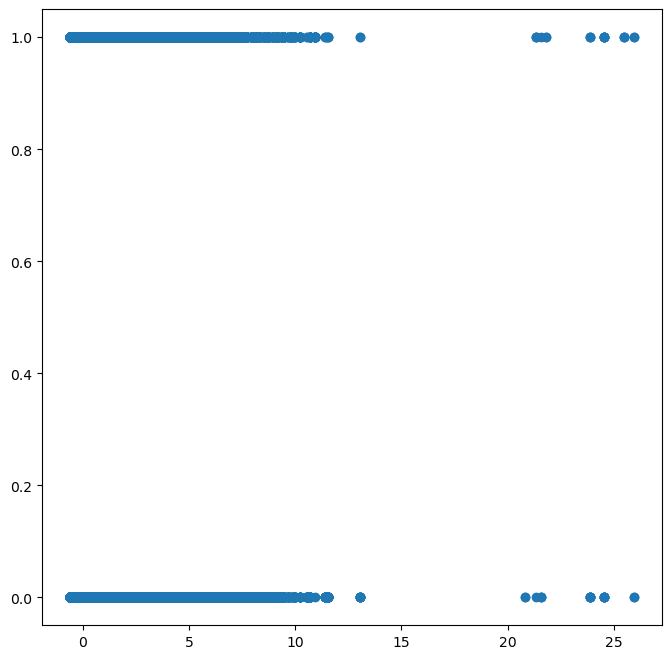

In [382]:
plt.figure(figsize=(8,8))
plt.scatter(X['OPAnnualReimbursementAmt'],Y)

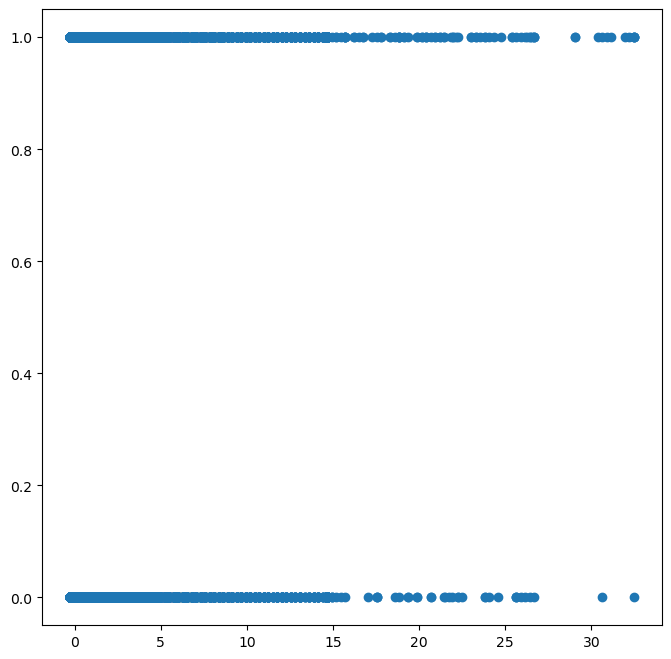

In [383]:
plt.figure(figsize=(8,8))
plt.scatter(X['claim'],Y)


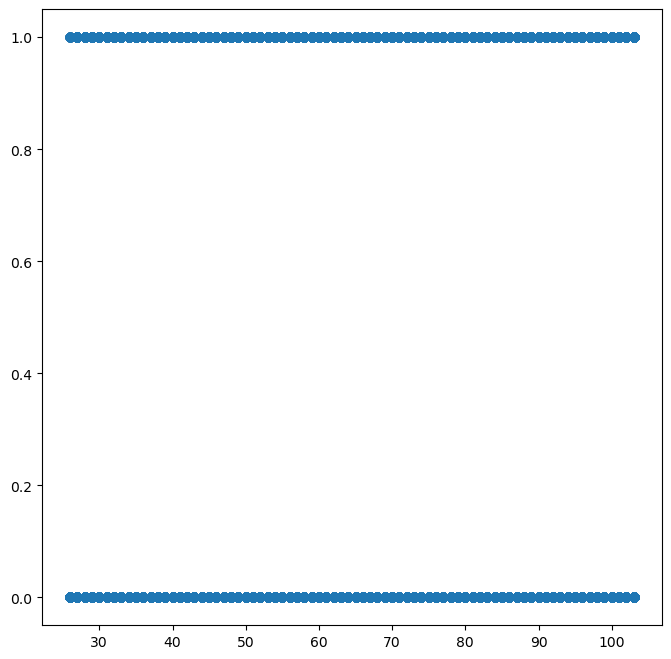

In [384]:
plt.figure(figsize=(8,8))
plt.scatter(X['age'],Y)

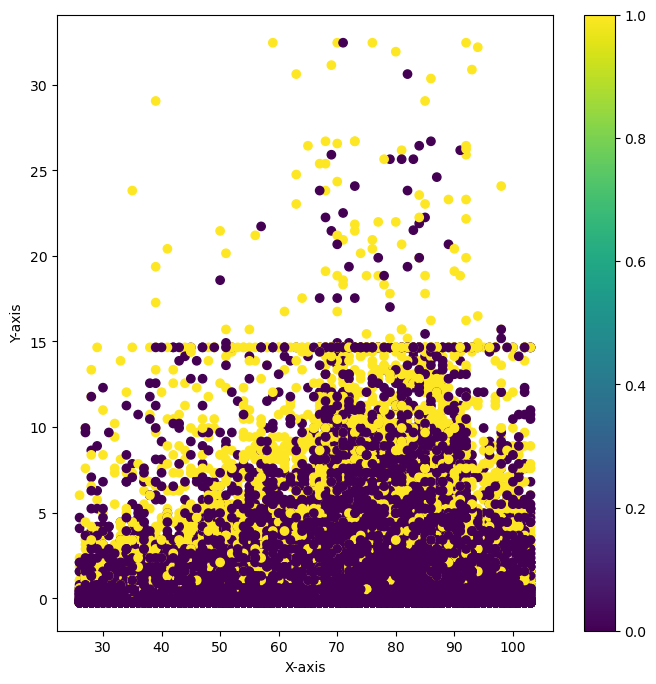

In [385]:
plt.figure(figsize=(8,8))
plt.scatter(X['age'],X['claim'],c=Y)
    # add a colorbar to the plot
plt.colorbar()

            # set the labels for the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# show the plot
plt.show()

In [386]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2



scaler = MinMaxScaler()
x = scaler.fit_transform(X)
# perform univariate feature selection using chi-squared test
X_new = SelectKBest(chi2, k=4).fit_transform(x, Y)

# print the selected features
print(X_new.shape)

(558211, 4)


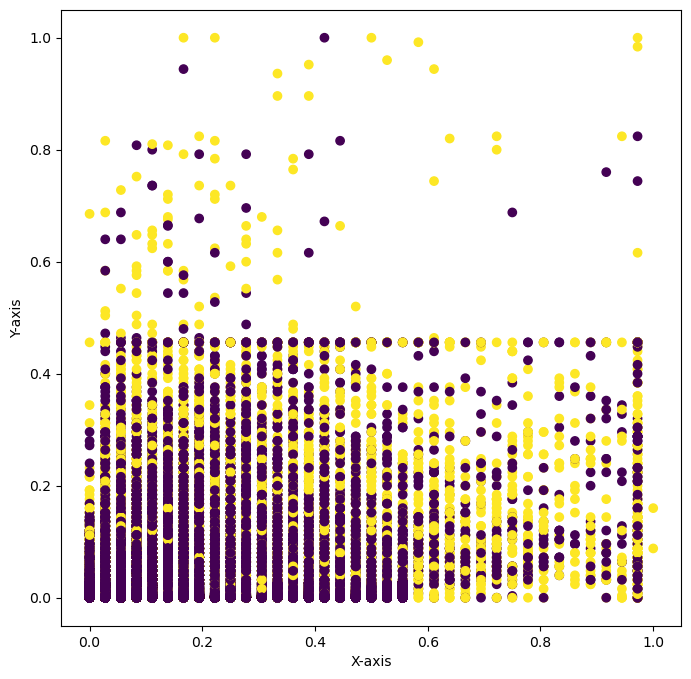

In [387]:
plt.figure(figsize=(8,8))
plt.scatter(X_new[:,2],X_new[:,1],c=Y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')


plt.show()

In [388]:
X= X.reset_index(drop=True)

## Splitting the Data into Training set and testing set

In [389]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y, test_size=1/10, train_size=9/10) 

In [390]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
classifier = LogisticRegression().fit(Xtrain, Ytrain)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [391]:
yhat=classifier.predict(Xtest)

In [392]:
from sklearn.metrics import accuracy_score  
print(f'Accuracy Score is {accuracy_score(Ytest,yhat)}')  

Accuracy Score is 0.6314535487800509


In [393]:
print(f'Precision Score is {precision_score(Ytest,yhat)}') 

Precision Score is 0.5800683670786222


In [394]:
print(f'Recall Score is {accuracy_score(Ytest,yhat)}') 

Recall Score is 0.6314535487800509


In [395]:
print(f'f1 Score is {f1_score(Ytest,yhat)}') 

f1 Score is 0.17658595157094256


In [396]:
Xtest

,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,DeductibleAmtPaid,claim,period,phy_same,x0_1,x0_2,RenalDiseaseIndicator,age,alife,Provider,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_stroke
175041,0.572350,-0.378933,-0.286191,0.131619,0,3,0.0,1.0,0,77,1,5133,12,12,2,2,2,2,2,2,1,2
302643,-0.172141,-0.289115,-0.286191,-0.258277,0,3,0.0,1.0,0,68,1,1281,12,12,1,1,2,1,1,1,1,2
238862,-0.494153,-0.628429,-0.286191,-0.247810,0,3,1.0,0.0,0,93,0,120,0,12,1,1,2,2,1,1,1,2
543389,-0.522490,-0.488712,-0.286191,-0.242576,0,3,0.0,1.0,0,70,1,4473,12,12,1,2,2,2,1,1,2,2
62806,-0.257152,-0.398893,-0.286191,-0.130056,0,3,0.0,1.0,0,37,1,3865,12,12,2,1,2,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272937,0.719188,0.429434,-0.286191,-0.234726,0,3,0.0,1.0,0,75,1,1467,12,12,1,2,2,2,1,1,1,2
359288,-0.452936,-0.299095,3.611384,0.262457,3,1,0.0,1.0,0,63,1,3358,12,12,1,1,1,2,2,2,1,2
28674,0.196240,-0.179337,-0.286191,-0.239959,18,3,0.0,1.0,0,74,1,363,12,12,2,1,2,1,1,1,1,2
177046,-0.329283,-0.049599,-0.286191,-0.025386,20,3,1.0,0.0,1,92,1,883,12,12,2,1,1,1,2,2,2,2


In [397]:
model = Sequential(
    [               
        tf.keras.Input(shape=(22,)),    #specify input size
        ### START CODE HERE ### 
        Dense(units=256,activation='linear',kernel_regularizer=keras.regularizers.l2(0.0001)),
        Dense(units=128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.0001)),
        Dense(units=1,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001))
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)     

In [398]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               5888      
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 38,913
Trainable params: 38,913
Non-trainable params: 0
_________________________________________________________________


In [399]:
Xtrain = tf.constant(np.asarray(Xtrain), dtype=tf.float32)
Ytrain = tf.constant(np.asarray(Ytrain), dtype=tf.float32)

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.0001),
)

model.fit(Xtrain,Ytrain,epochs=50)

Epoch 1/50
15700/15700 [==============================] - 50s 3ms/step - loss: 1.5981
Epoch 2/50
15700/15700 [==============================] - 49s 3ms/step - loss: 1.3447
Epoch 3/50
15700/15700 [==============================] - 48s 3ms/step - loss: 1.1610
Epoch 4/50
15700/15700 [==============================] - 49s 3ms/step - loss: 1.0813
Epoch 5/50
15700/15700 [==============================] - 48s 3ms/step - loss: 0.9925
Epoch 6/50
15700/15700 [==============================] - 49s 3ms/step - loss: 0.9497
Epoch 7/50
 9956/15700 [==================>...........] - ETA: 17s - loss: 0.9133

In [ ]:
Xtest = tf.constant(np.asarray(Xtest), dtype=tf.float32)
Ytest = tf.constant(np.asarray(Ytest), dtype=tf.float32)

In [ ]:
prediction = model.predict(Xtrain)

In [ ]:
yhut=[]
for i in range(len(prediction)):
    if prediction[i] >= 0.55:
      
        yhut.append(1)
    else:                                #if threshold is high then there will be less False Positive - Prediction a good one as fraud will be more
                                        # if the threshold is low then there will be False Negative -- Prediction a good one as fraud will be less
        yhut.append(0)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
print('Precision: %.3f' % precision_score(Ytrain, yhut))

In [ ]:
print(f'Accuracy Score is {accuracy_score(Ytrain,yhut)}') 

In [ ]:
print('recall: %.3f' % recall_score(Ytrain, yhut))

In [ ]:
print('f1 score: %.3f' % f1_score(Ytrain, yhut))

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(Xtrain, Ytrain)

In [ ]:
print(model)

In [ ]:
y_pred = model.predict(Xtest)
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print('Precision: %.3f' % precision_score(Ytest,predictions))

In [ ]:
print('Recall: %.3f' % recall_score(Ytest,predictions))

In [ ]:
print('F1: %.3f' % f1_score(Ytest,predictions))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as XG

In [ ]:
model1 = XG( learning_rate=0.1, max_depth=6,n_estimators=50)
model1.fit(Xtrain, Ytrain)

In [ ]:
y_pred = model1.predict(Xtest)

predictions1 = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(Ytest, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print('Precision: %.3f' % precision_score(Ytest,predictions1))

In [ ]:
print('Recall: %.3f' % recall_score(Ytest,predictions1))

In [ ]:
print('F1: %.3f' % f1_score(Ytest,predictions1))

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
plot_tree(model)
# plt.figure(figsize=(100,100))
plt.show()



In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,Y = oversample.fit_resample(X, Y)

In [ ]:
model1 = XG( learning_rate=0.1, max_depth=4,n_estimators=5)
model1.fit(Xtrain, Ytrain)

In [ ]:
y_pred = model1.predict(Xtest)

predictions2 = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(Ytest, predictions2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
print('Precision: %.3f' % precision_score(Ytest,predictions2))

In [ ]:
print('Recall: %.3f' % recall_score(Ytest,predictions2))

In [ ]:
classifier = LogisticRegression().fit(Xtrain, Ytrain)

In [ ]:
yhat=classifier.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score  
print(f'Accuracy Score is {accuracy_score(Ytest,yhat)}') 

In [ ]:
print(f'Precision Score is {precision_score(Ytest,yhat)}') 